In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
plt.style.use("fivethirtyeight")

In [17]:
data = pd.read_csv("D:\\mini project\\churn.csv")

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
data.shape

(7043, 21)

In [21]:
data.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
data.groupby('Churn')[['MonthlyCharges', 'tenure']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure               
                 min     max       mean    min max       mean
Churn                                                        
No             18.25  118.75  61.265124      0  72  37.569965
Yes            18.85  118.35  74.441332      1  72  17.979133

TotalCharges columns has numeric values but looks object type.

In [23]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [24]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [25]:
data[data['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [26]:
data['TotalCharges'].isna().sum()

11

In [27]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [28]:
data['TotalCharges'].dtypes

dtype('float64')

In [29]:
data.groupby('Churn')[['MonthlyCharges', 'tenure', 'TotalCharges']].agg(['min', 'max', 'mean'])

MonthlyCharges                    tenure                TotalCharges  \
                 min     max       mean    min max       mean          min   
Churn                                                                        
No             18.25  118.75  61.265124      0  72  37.569965        18.80   
Yes            18.85  118.35  74.441332      1  72  17.979133        18.85   

                             
           max         mean  
Churn                        
No     8672.45  2555.344141  
Yes    8684.80  1531.796094

Since, we have 11 null values in dataset, either we can fill them, or remove them. 11 is a low number, so I will drop them.

In [30]:
data.dropna(inplace = True)

In [31]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
data.shape

(7032, 21)

In [33]:
data.groupby('Churn')[['OnlineBackup', 'OnlineSecurity', 'PhoneService']].count()

,OnlineBackup,OnlineSecurity,PhoneService
Churn,,,
No,5163,5163,5163
Yes,1869,1869,1869


In [34]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

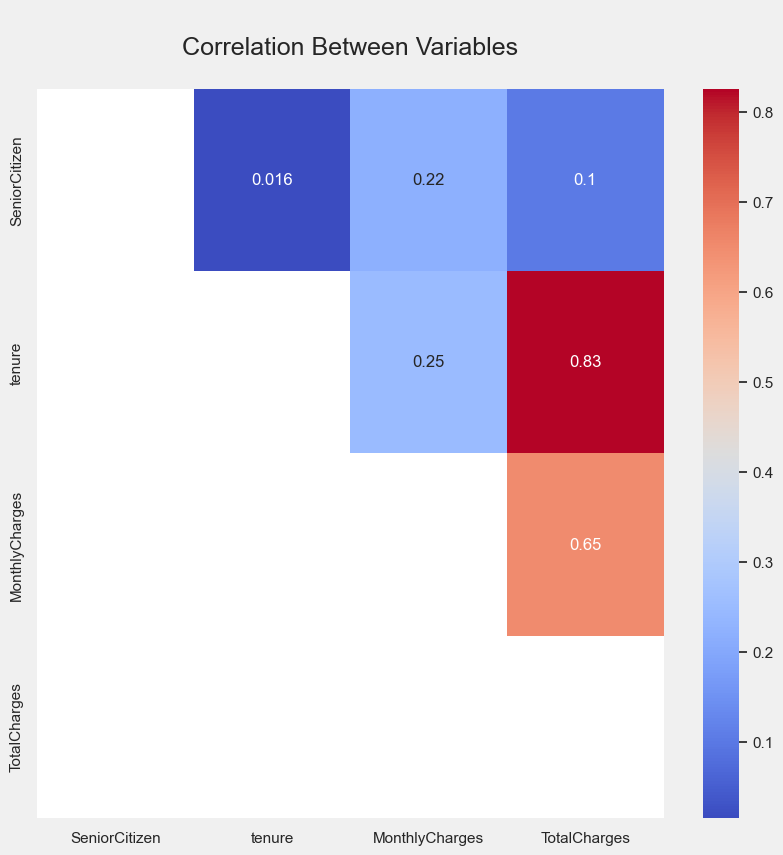

In [35]:
half_corr_heatmap(data, 'Correlation Between Variables')

**Churn columns is not there because its dtype is object. Converting objects into a numeric.**

In [36]:
data['Churn'] = data['Churn'].map({'Yes' : 1, 'No' : 0})

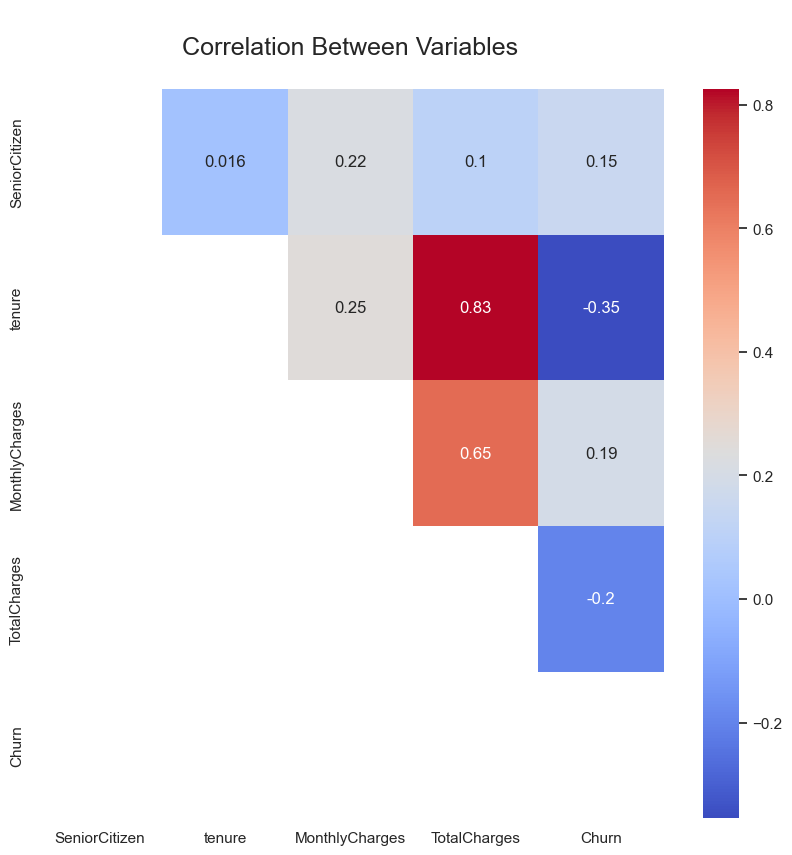

In [37]:
half_corr_heatmap(data, 'Correlation Between Variables')

In [38]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

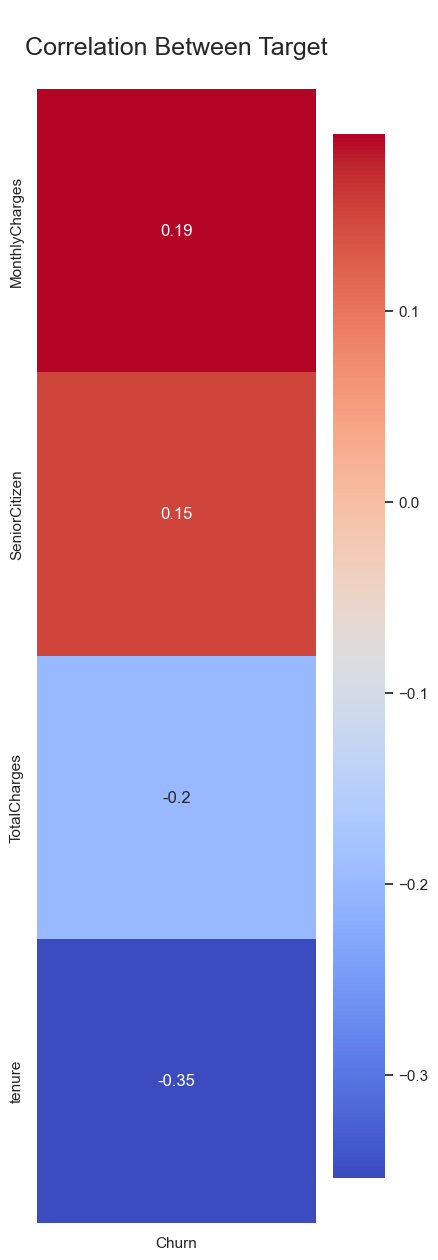

In [39]:
corr_for_target(data, 'Churn', 'Correlation Between Target')

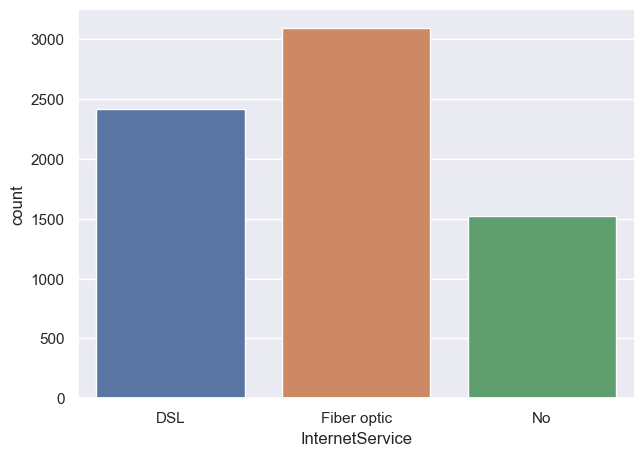

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'InternetService' is a categorical column in your DataFrame
sns.countplot(data=data, x='InternetService')
plt.show()


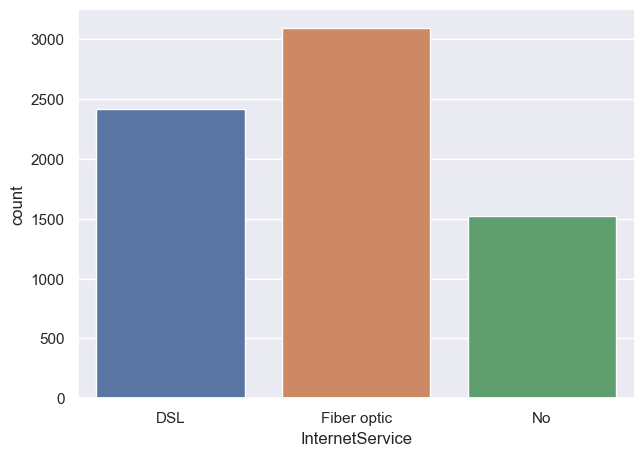

In [47]:
sns.countplot(data=data, x='InternetService')
plt.show()

In [48]:
data2 = data.drop(['customerID'], axis = 1)

To observe numerical, and numeric columns:

In [49]:
numerical = data2.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data2.columns.difference(numerical)

data2[categorical] = data2[categorical].astype('object')
print(f'Categorical: {categorical}')

Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

Categorical: Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'StreamingMovies',
       'StreamingTV', 'TechSupport', 'gender'],
      dtype='object')


Creating ones, and zeros from categorical variables:

In [50]:
data2 = pd.get_dummies(data2)

In [51]:
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


Checking unique values of every column:

In [52]:
data_cols = data.drop('customerID', axis = 1)

for col in data_cols.columns:
    print(col, "\n")
    print(data[col].unique(), "\n")

gender 

['Female' 'Male'] 

SeniorCitizen 

[0 1] 

Partner 

['Yes' 'No'] 

Dependents 

['No' 'Yes'] 

tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService 

['No' 'Yes'] 

MultipleLines 

['No phone service' 'No' 'Yes'] 

InternetService 

['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 

['No' 'Yes' 'No internet service'] 

OnlineBackup 

['Yes' 'No' 'No internet service'] 

DeviceProtection 

['No' 'Yes' 'No internet service'] 

TechSupport 

['No' 'Yes' 'No internet service'] 

StreamingTV 

['No' 'Yes' 'No internet service'] 

StreamingMovies 

['No' 'Yes' 'No internet service'] 

Contract 

['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 

['Yes' 'No'] 

PaymentMethod 

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 

[29

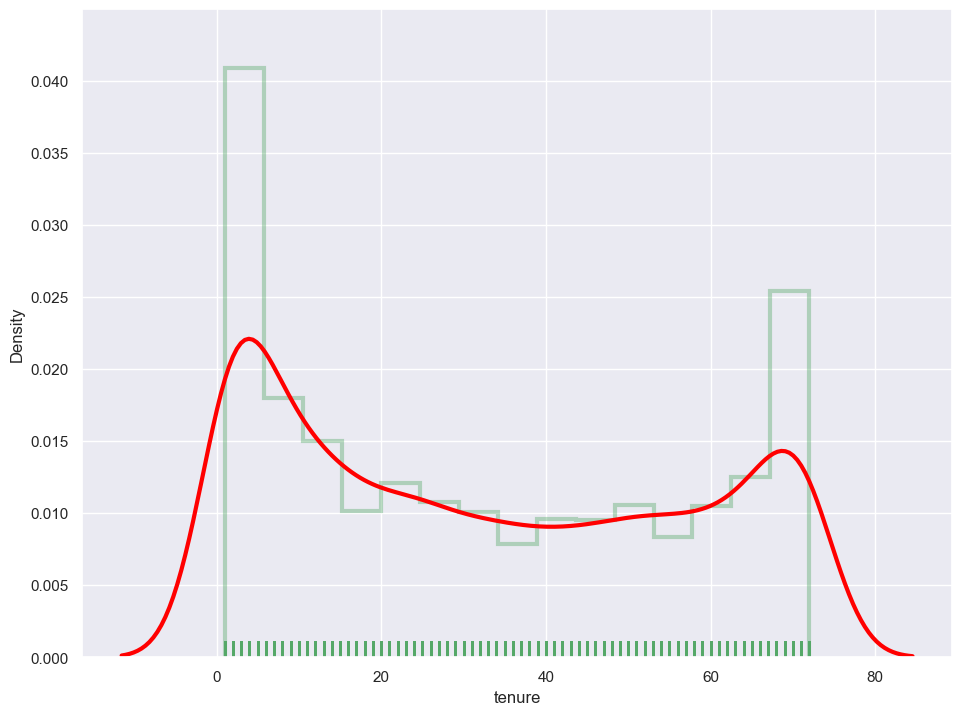

In [53]:
plt.figure(figsize = (10,8))

ax = sns.distplot(data['tenure'], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "red", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.4, "color": "g"});

### There are people staying with this company for about 70 years. 

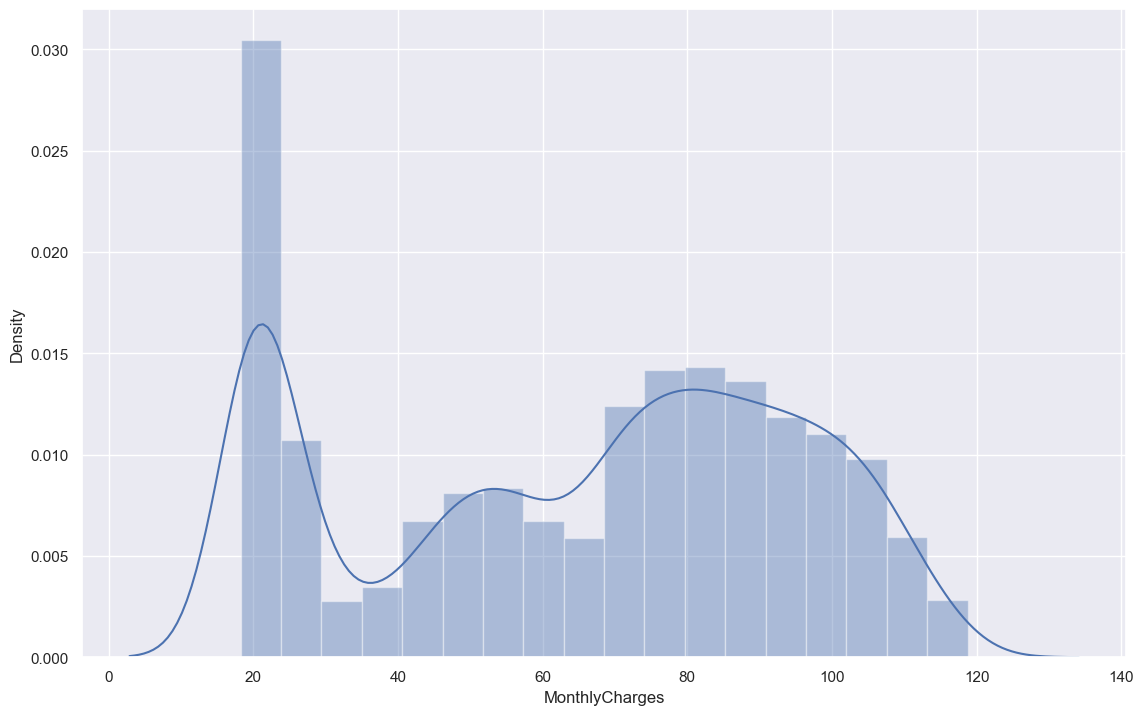

In [54]:
plt.figure(figsize=(12,8))

sns.distplot(data['MonthlyCharges']);

### Most of the customer has low monthly charge.

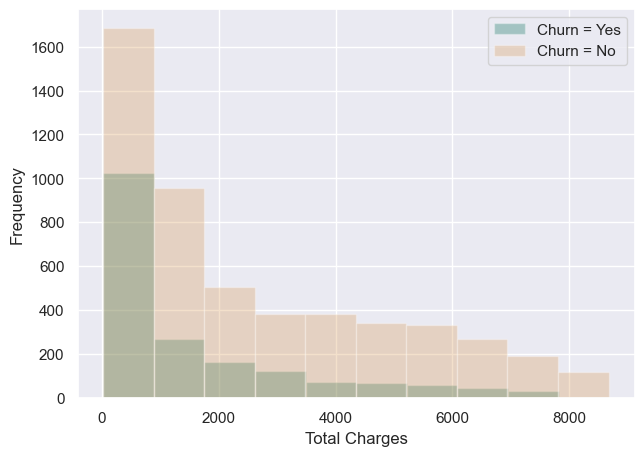

In [55]:
data[data['Churn'] == 1].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#016a55', label = 'Churn = Yes')

data[data['Churn'] == 0].TotalCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Total Charges')
plt.legend();

### Those with lower total charges have left the brand most.

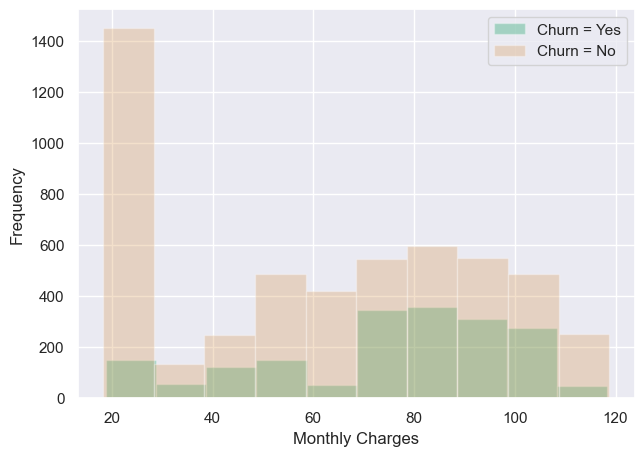

In [56]:
data[data['Churn'] == 1].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Churn = Yes')

data[data['Churn'] == 0].MonthlyCharges.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'Churn = No')

plt.xlabel('Monthly Charges')
plt.legend();

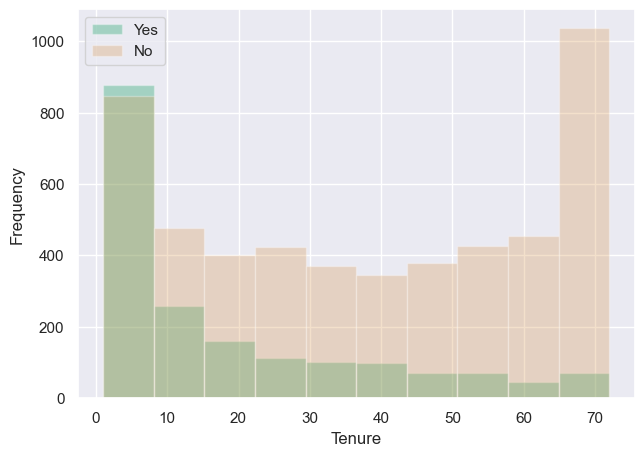

In [57]:
data[data['Churn'] == 1].tenure.plot(kind = 'hist', alpha = 0.3, color = '#019955', label = 'Yes')

data[data['Churn'] == 0].tenure.plot(kind = 'hist', alpha = 0.3, color = '#d89955', label = 'No')

plt.xlabel('Tenure')
plt.legend();

### Those who have registered with the brand for 1-8 years has higher number of leaving the brand.

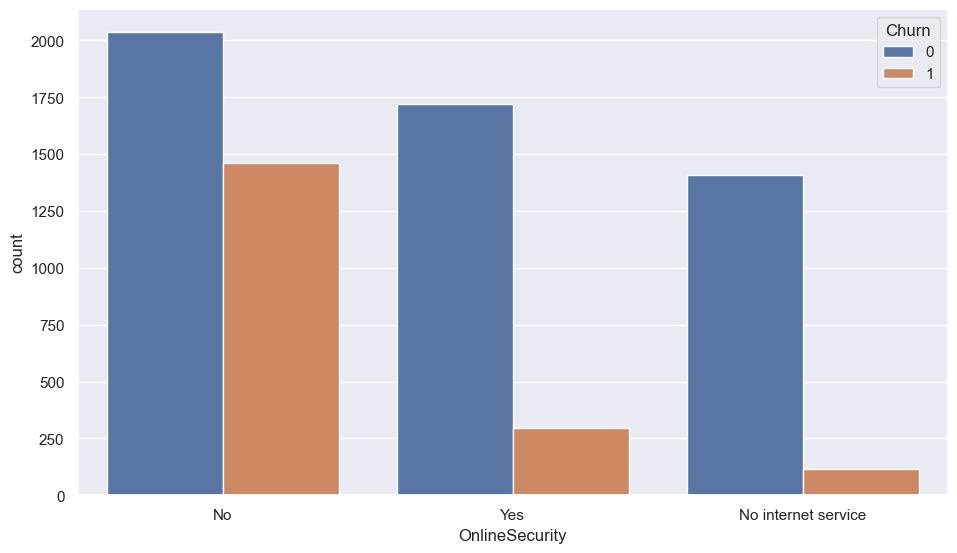

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='OnlineSecurity', data=data, hue='Churn')
plt.show()


### Those who do not have online protection have a higher number of leaving the brand.

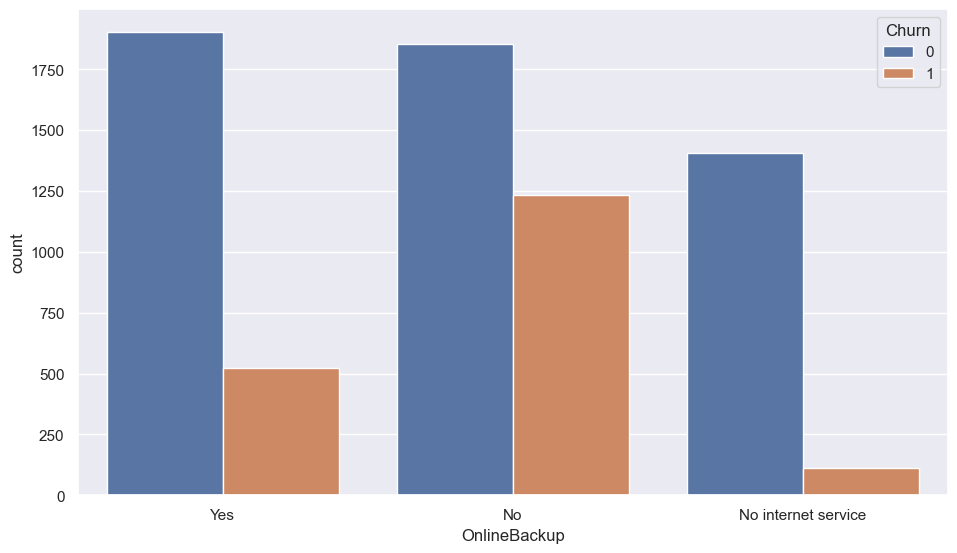

In [64]:
plt.figure(figsize = (10, 6))

sns.countplot(x='OnlineBackup', data = data, hue = 'Churn');
plt.show()

### Those who don't have online backup have a higher number of leaving the brand.

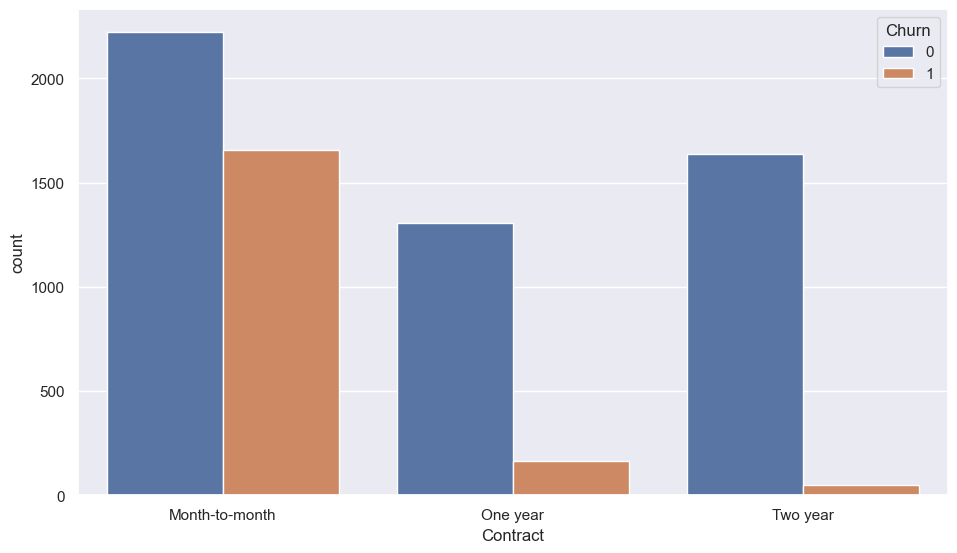

In [65]:
plt.figure(figsize = (10, 6))

sns.countplot(x='Contract', data = data, hue = 'Churn');

### Those who have month-to-month contract have a higher number of leaving the brand.

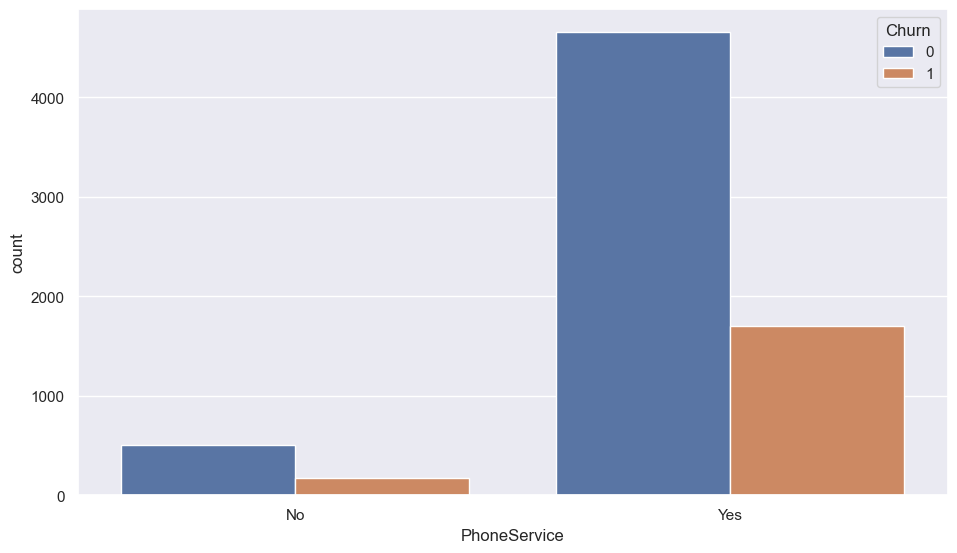

In [66]:
plt.figure(figsize = (10, 6))

sns.countplot(x='PhoneService', data = data, hue = 'Churn');

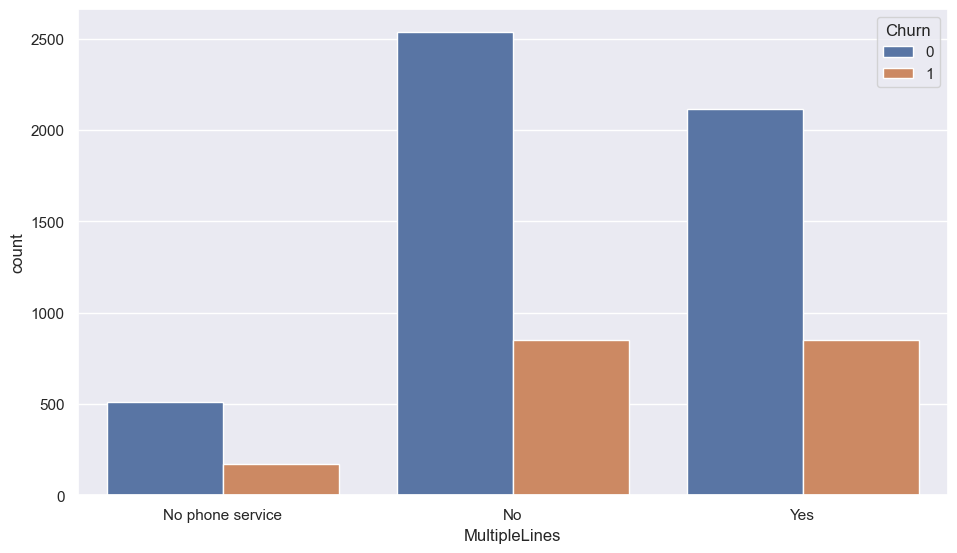

In [67]:
plt.figure(figsize = (10, 6))

sns.countplot(x='MultipleLines', data = data, hue = 'Churn');

### There is not much difference in the number of times people with or without multiple lines leaving the brand.

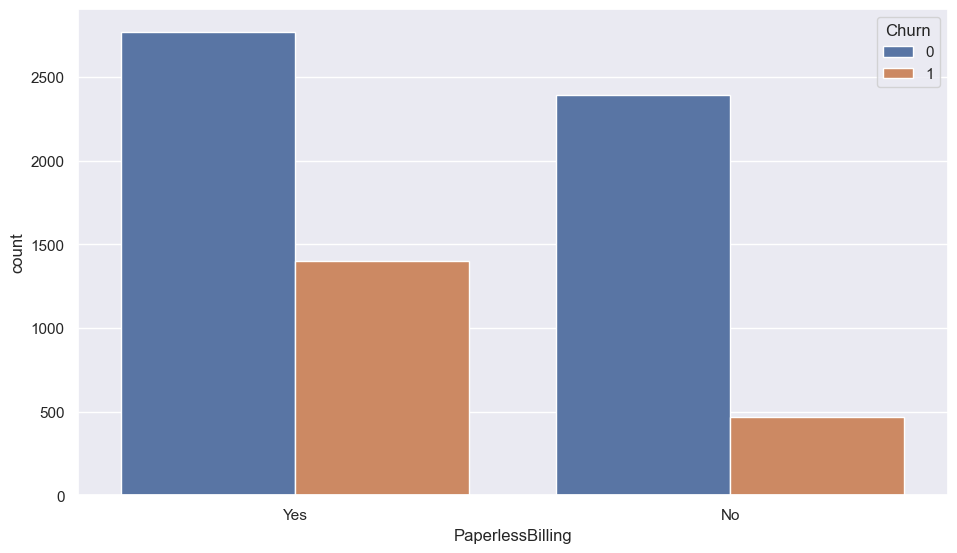

In [68]:
plt.figure(figsize = (10, 6))

sns.countplot(x='PaperlessBilling', data = data, hue = 'Churn');

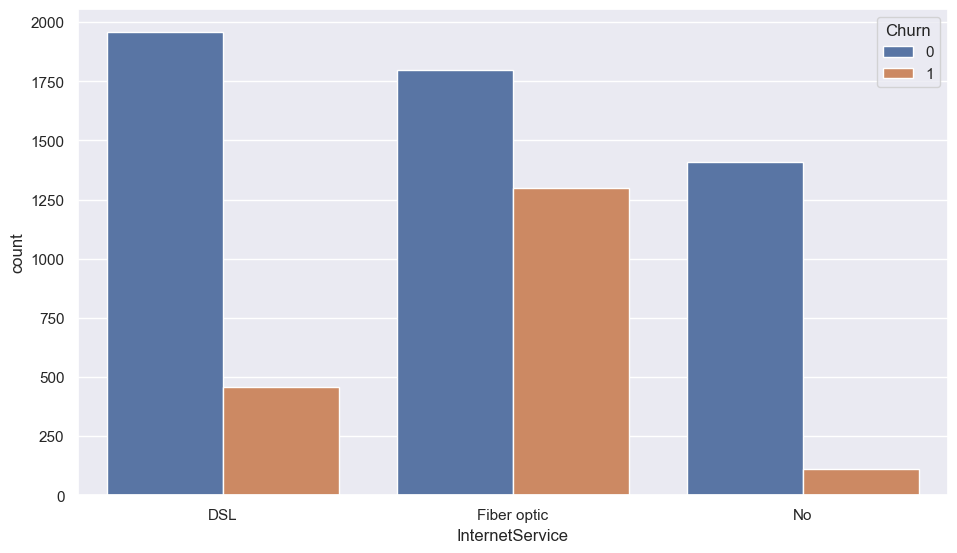

In [69]:
plt.figure(figsize = (10, 6))

sns.countplot(x='InternetService', data = data, hue = 'Churn');

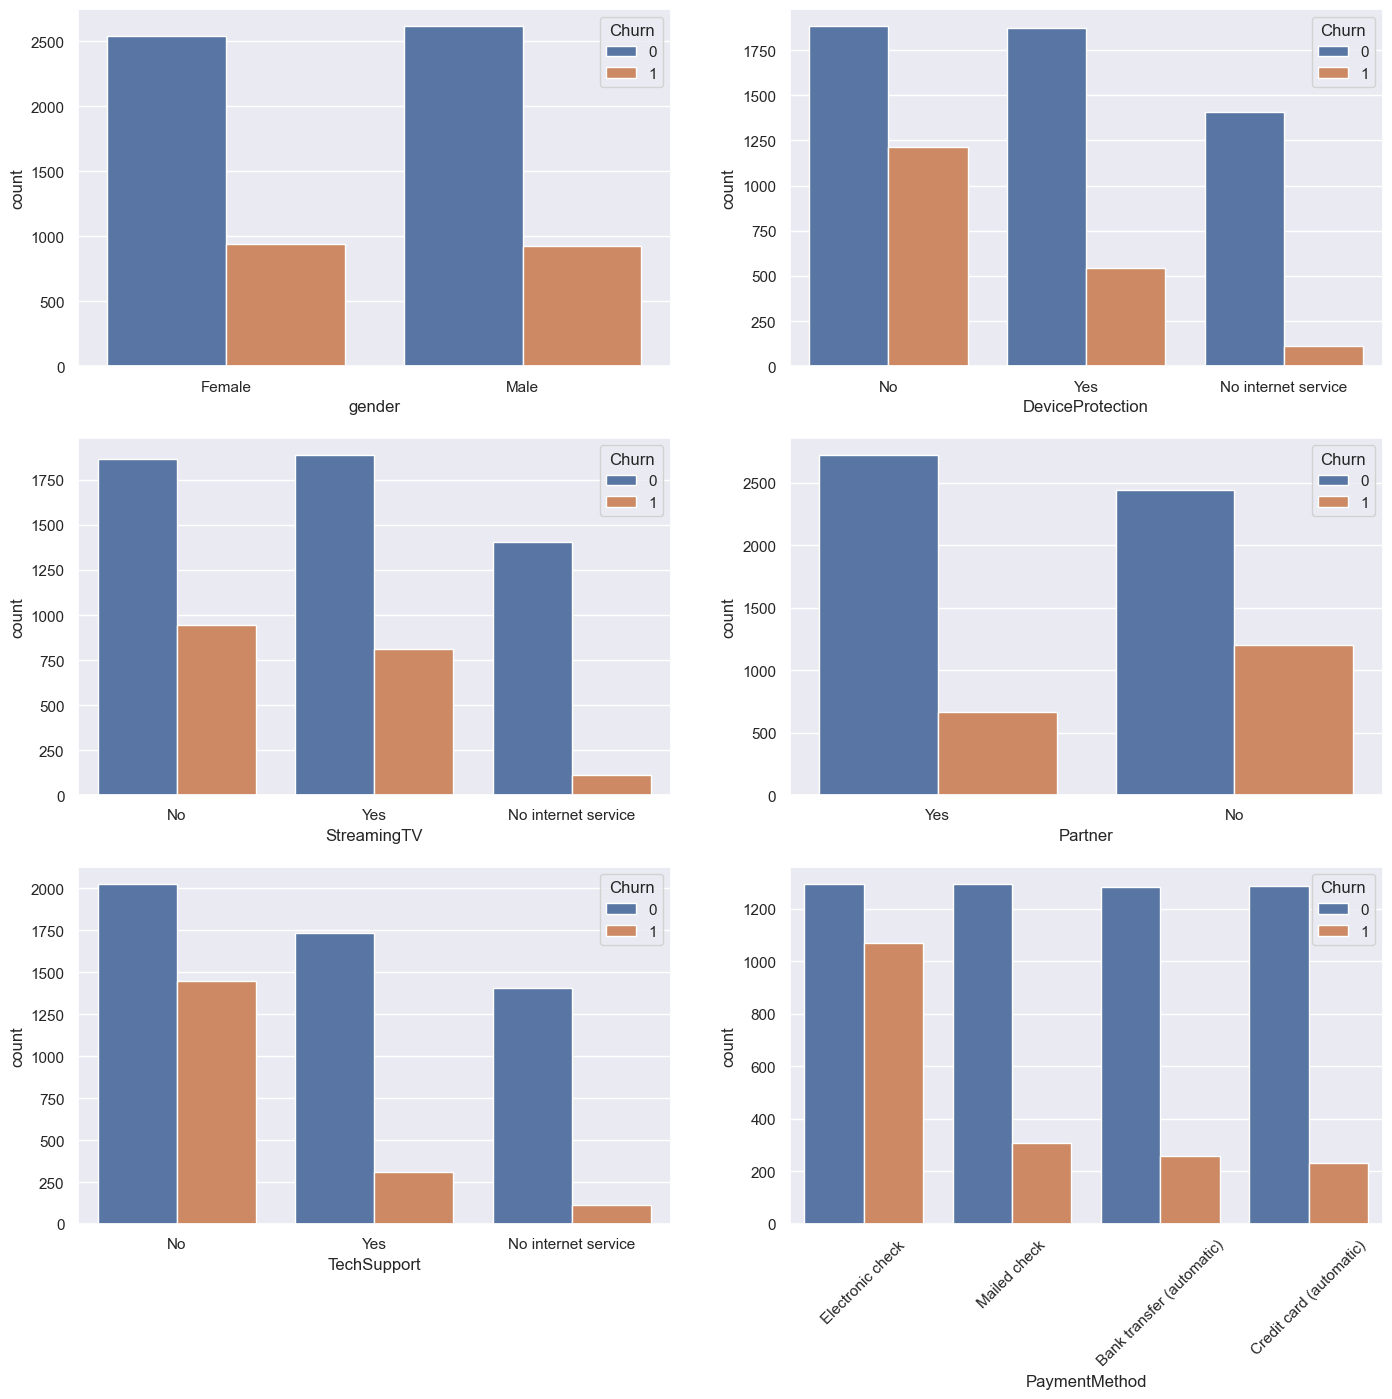

In [71]:

plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot(x='gender', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot(x='DeviceProtection', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot(x='StreamingTV', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot(x='Partner', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot(x='TechSupport', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot(x='PaymentMethod', data=data, hue='Churn')

plt.xticks(rotation=45)
plt.show()


<Figure size 2000x700 with 0 Axes>

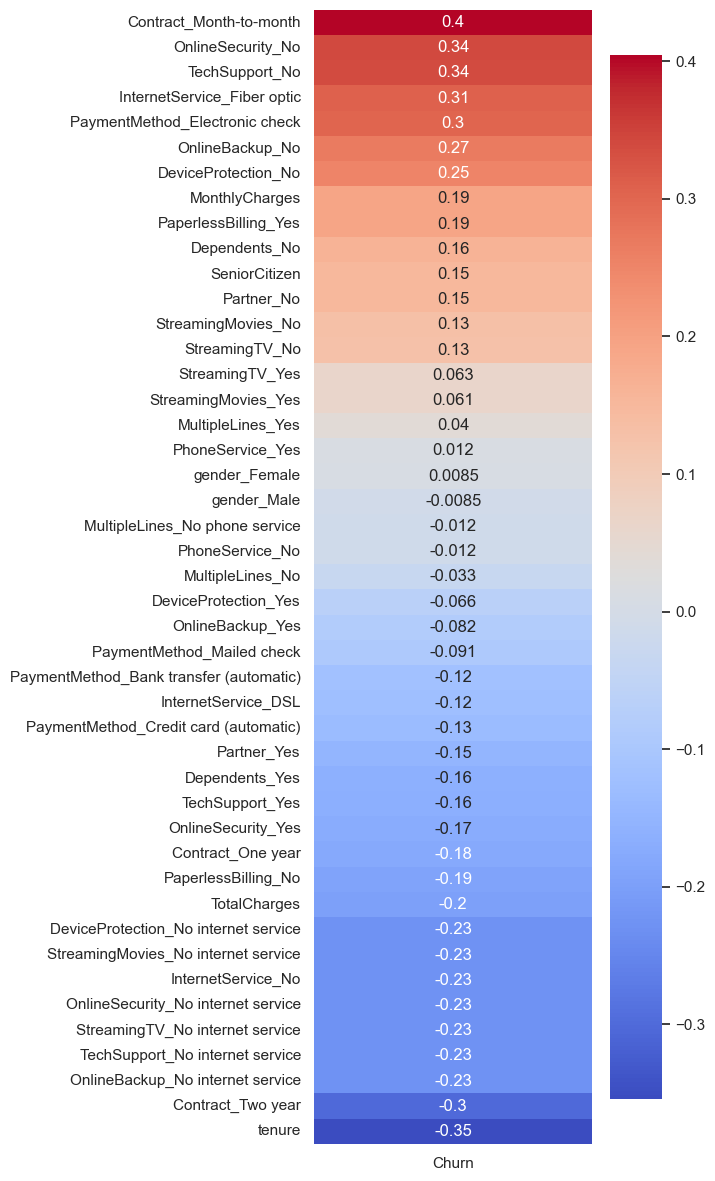

In [72]:
plt.figure(figsize = (20, 7))

corr_for_target(data2, 'Churn');

### Splitting the Data

In [73]:
X = data2.drop('Churn', axis=1)

y = data2['Churn']

# Model Building

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42)

In [76]:
models = []
models.append(('Random Forest Clas.', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Clas.', DecisionTreeClassifier()))
models.append(("LightGBM", LGBMClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('Logistic Reg.', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('SVC', SVC()))

Creating a for loop to see cross validation scores for every model above:

In [77]:
model_names = []
scores = []

for name, model in models:
    score = cross_val_score(model, X, y, cv = 10, scoring='accuracy')
    scores.append(score)
    model_names.append(name)
    print(f"Mean of the {name} model scores : {score.mean()}")

Mean of the Random Forest Clas. model scores : 0.7926580887107203
Mean of the KNN model scores : nan
Mean of the Decision Tree Clas. model scores : 0.7217008276218804
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 6328, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265803 -> initscore=-1.016023
[LightGBM] [Info] Start training from score -1.016023
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1682, number of negative: 4646
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can se

# Feature Importance By LightGBM

Checking the features that are most important for LGBM:

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1869, number of negative: 5163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 7032, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265785 -> initscore=-1.016114
[LightGBM] [Info] Start training from score -1.016114


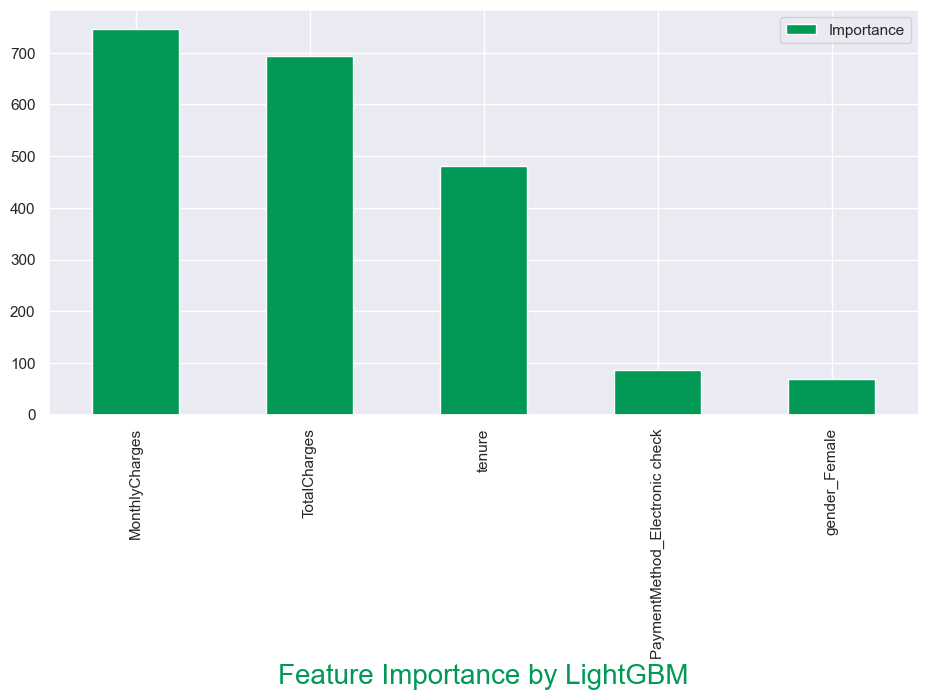

In [78]:
feature_importance = pd.DataFrame({'Importance' : LGBMClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (10, 5))
plt.xlabel("Feature Importance by LightGBM", color = "#019955", fontdict= {"fontsize" : 20});

Model building with all features:

In [79]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, y_train)

y_pred_lgbm = model_lgbm.predict(X_test)
y_pred_lgbm_train = model_lgbm.predict(X_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1259, number of negative: 3452
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4711, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267247 -> initscore=-1.008636
[LightGBM] [Info] Start training from score -1.008636


In [80]:
lgbm_test_as = metrics.accuracy_score(y_pred_lgbm, y_test)
lgbm_train_as = metrics.accuracy_score(y_pred_lgbm_train, y_train)

print(f"LGBM accuracy score for test data {lgbm_test_as}")
print(f"LGBM accuracy score for train data {lgbm_train_as}")

LGBM accuracy score for test data 0.7850064627315813
LGBM accuracy score for train data 0.9006580343876035


#### Accuracy score between train and test data is slightly high.

Let's try again with the new features that we got above.

In [81]:
X_train_new = X_train[['MonthlyCharges', 'TotalCharges', 'tenure', 'PaymentMethod_Electronic check']]

X_test_new = X_test[['MonthlyCharges', 'TotalCharges', 'tenure', 'PaymentMethod_Electronic check']]

In [82]:
new_model_lgbm = LGBMClassifier()
new_model_lgbm.fit(X_train_new, y_train)

new_y_pred = new_model_lgbm.predict(X_test_new)
lgbm_ft_as = metrics.accuracy_score(new_y_pred, y_test)
lgbm_ft_as

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1259, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 585
[LightGBM] [Info] Number of data points in the train set: 4711, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267247 -> initscore=-1.008636
[LightGBM] [Info] Start training from score -1.008636


0.7819905213270142

In [83]:
new_y_pred_train = new_model_lgbm.predict(X_train_new)
lgbm_ft_as_ = metrics.accuracy_score(new_y_pred_train, y_train)
lgbm_ft_as_

0.855656973041817

Not much thing has changed actually. We couldn't improve our model like we want it to be.

# Logistic Regression

In [84]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [85]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [86]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.8031021111589832
Accuracy score for train data : 0.8076841434939503


In [87]:
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1822
           1       0.53      0.65      0.59       499

    accuracy                           0.80      2321
   macro avg       0.72      0.75      0.73      2321
weighted avg       0.82      0.80      0.81      2321



In [88]:
metrics.confusion_matrix(log_y_pred, y_test)

array([[1538,  284],
       [ 173,  326]], dtype=int64)

In [89]:
metrics.confusion_matrix(log_y_pred_train, y_train)

array([[3104,  558],
       [ 348,  701]], dtype=int64)

In [90]:
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

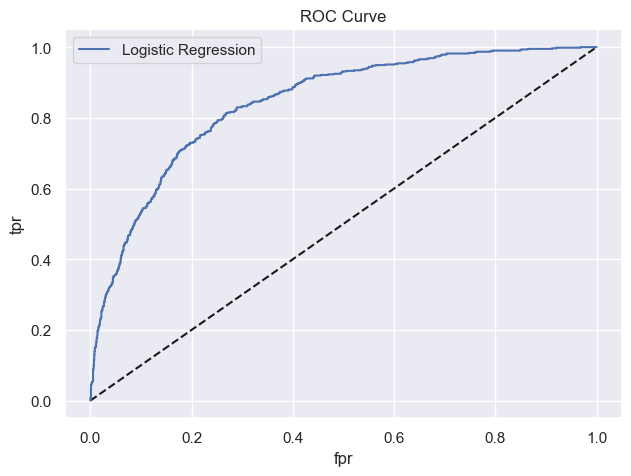

In [91]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [92]:
metrics.roc_auc_score(y_test, y_proba_log)

0.8422856923858161

In [93]:
y_proba_log_train = log.predict_proba(X_train)[:, 1]
metrics.roc_auc_score(y_train, y_proba_log_train)

0.8468446651087834

# SVC

In [94]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [95]:
y_pred_svc = svc.predict(X_test)
y_pred_train = svc.predict(X_train)

svc_train_as = metrics.accuracy_score(y_train, y_pred_train)
svc_as = metrics.accuracy_score(y_test, y_pred_svc)

In [96]:
print(f"Accuracy score for test data : {svc_as}")
print(f"Accuracy score for train data : {svc_train_as}")

Accuracy score for test data : 0.7371822490305903
Accuracy score for train data : 0.73275313097007


In [97]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1711
           1       0.00      0.00      0.00       610

    accuracy                           0.74      2321
   macro avg       0.37      0.50      0.42      2321
weighted avg       0.54      0.74      0.63      2321



Let's try after scaling the data.

In [98]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [99]:
svc_sc = SVC()
svc_sc.fit(X_train_sc, y_train)

y_pred_sc = svc_sc.predict(X_test_sc)
y_pred_sc_train = svc_sc.predict(X_train_sc)

svc_sc_train_as = metrics.accuracy_score(y_train, y_pred_sc_train)
svc_sc_as = metrics.accuracy_score(y_test, y_pred_sc)

In [100]:
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}")

Accuracy score for test data : 0.7970702283498492
Accuracy score for train data : 0.8193589471449798


In [101]:
params = {'kernel' : ['rbf'], 'C' : [0.1, 1, 5, 10], 'gamma' : [0.01, 0.1, 0.9, 1]}

grid = GridSearchCV(SVC(), params, cv = 5, return_train_score= False)

In [107]:
# grid.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': [0.01, 0.1, 0.9, 1],
                         'kernel': ['rbf']})

In [103]:
# grid.best_params_
 #best_params_ : [C = 1, gamma = 0.01, kernel = 'rbf']

In [104]:
# grid.best_score_
 #best_score_ : 0.7968569389377085

Model tunning with the best params.

In [105]:
# svc_new = SVC(**grid.best_params_)
svc_new = SVC(C = 1, gamma = 0.01, kernel = 'rbf')
svc_new.fit(X_train_sc, y_train)

y_pred_new = svc_new.predict(X_test_sc)
y_pred_new_train = svc_new.predict(X_train_sc)

svc_new_train_as = metrics.accuracy_score(y_train, y_pred_new_train)
svc_new_as = metrics.accuracy_score(y_test, y_pred_new)

print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}")

Accuracy score for test data : 0.7987936234381732
Accuracy score for train data : 0.8102313733814477


In [111]:
pip install --upgrade scikit-learn



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.0/9.2 MB 393.8 kB/s eta 0:00:24
   ---------------------------------------- 0.1/9.2 MB 469.7 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.2 MB 476.3 kB/s eta 0:00:20
   ---------------------------------------- 0.1/9.2 MB 504.4 kB/s eta 0:00:19
    --------------------------------------- 0.1/9.2 MB 450.6 kB/s eta 0:00:21
    --------------------------------------- 0.1/9.2 MB 450.6 kB/s eta 0:00:21
    --------------------------------------- 0.2/9.2 MB 399.3 kB/s eta 0:00:23
    ---------------

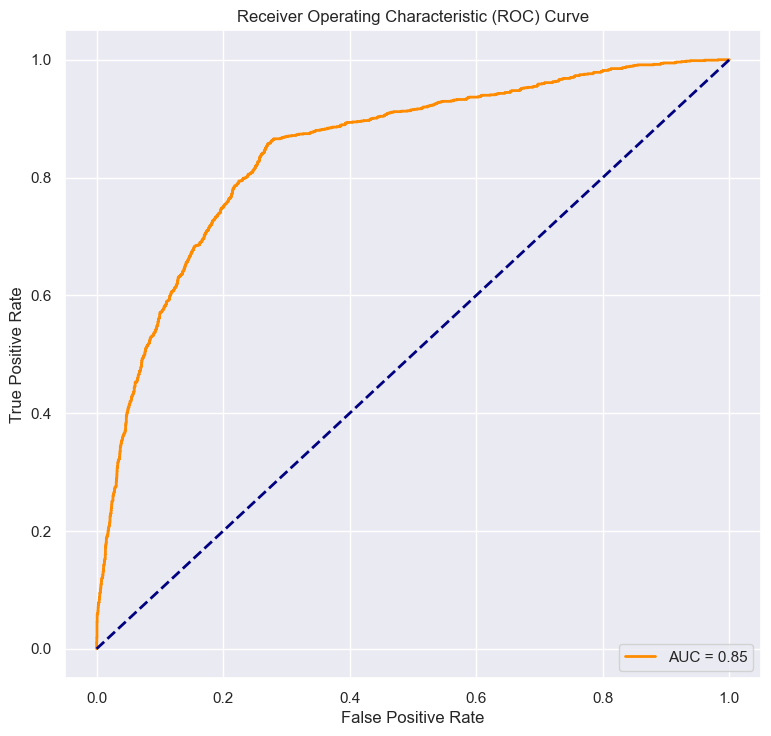

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming svc_new is your trained Support Vector Classifier (SVC)
# Assuming X_train_sc and y_train are your training data and labels

# Get the predicted probabilities for the positive class
y_scores = svc_new.decision_function(X_train_sc)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# KNN

In [116]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Convert your data to NumPy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

testscores = []
trainscores = []

for i in range(1, 10):
    model = KNeighborsClassifier(i)
    model.fit(X_train_np, y_train_np)
    
    test_pred = model.predict(X_test_np)
    train_pred = model.predict(X_train_np)
    
    testscores.append(metrics.accuracy_score(y_test_np, test_pred))
    trainscores.append(metrics.accuracy_score(y_train_np, train_pred))


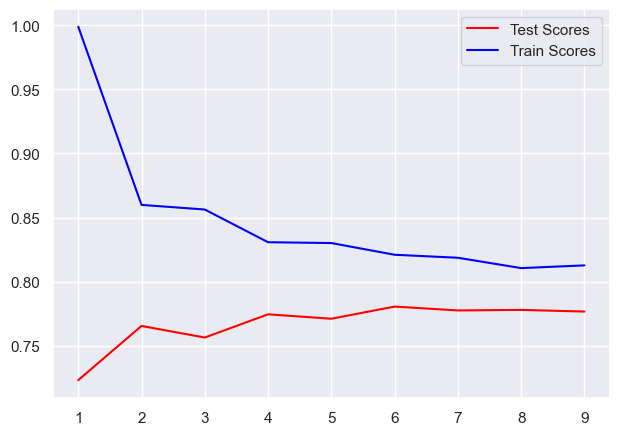

In [117]:
plt.plot(range(1, 10), testscores, label = 'Test Scores', color = 'red')

plt.plot(range(1, 10), trainscores, label = 'Train Scores', color = 'blue')

plt.legend();

We can choose k as 8.

In [120]:
knn = KNeighborsClassifier(8)
knn.fit(X_train, y_train)

# Convert pandas DataFrame to NumPy array
X_test_array = X_test.values
X_train_array = X_train.values

y_pred_knn = knn.predict(X_test_array)
y_pred_knn_train = knn.predict(X_train_array)


In [121]:
knn_as = metrics.accuracy_score(y_test, y_pred_knn)
knn_as_train = metrics.accuracy_score(y_train, y_pred_knn_train)

In [122]:
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}")

Accuracy score for test data : 0.7781128823782852
Accuracy score for train data : 0.8106559116960306


In [123]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[1582,  129],
       [ 386,  224]], dtype=int64)

In [124]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1711
           1       0.63      0.37      0.47       610

    accuracy                           0.78      2321
   macro avg       0.72      0.65      0.66      2321
weighted avg       0.76      0.78      0.76      2321



In [128]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.exceptions import NotFittedError

# Create KNeighborsClassifier
knn = KNeighborsClassifier(8)

# Try fitting knn and handle the exception if it occurs
try:
    knn.fit(X_train_array, y_train)
except NotFittedError:
    print("Error: KNeighborsClassifier is not fitted successfully")
    # Handle the error or exit gracefully

# Calibrate the classifier
calibrated_knn = CalibratedClassifierCV(knn, method='sigmoid', cv='prefit')

# Try fitting calibrated_knn and handle the exception if it occurs
try:
    calibrated_knn.fit(X_train_array, y_train)
except NotFittedError:
    print("Error: CalibratedClassifierCV is not fitted successfully")
    # Handle the error or exit gracefully

# Predict probabilities
y_proba = calibrated_knn.predict_proba(X_test_array)[:, 1]

# Now you can use y_proba for ROC curve or other metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba)


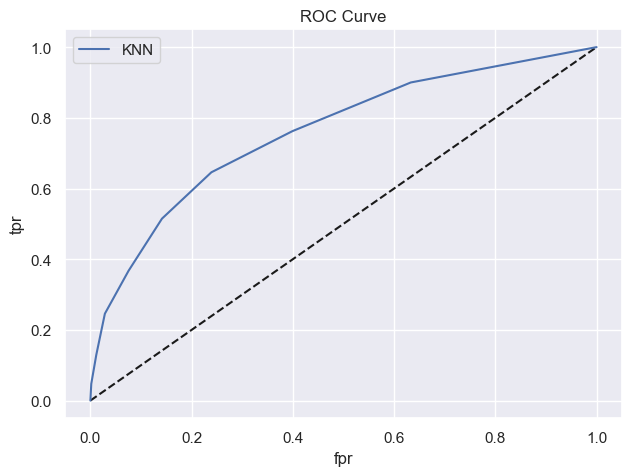

In [129]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

In [130]:
metrics.roc_auc_score(y_test, y_proba)

0.7599486447384809

In [131]:
metrics.confusion_matrix(y_pred_knn, y_test)

array([[1582,  386],
       [ 129,  224]], dtype=int64)

# Decision Tree Classifier

In [132]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_dt = decision_tree.predict(X_test)
y_pred_train_dt = decision_tree.predict(X_train)

In [133]:
dt_as = metrics.accuracy_score(y_test, y_pred_dt)
dt_as_train = metrics.accuracy_score(y_train, y_pred_train_dt)

print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}")

Accuracy score for test data : 0.7242567858681602
Accuracy score for train data : 0.9987263850562513


# Random Forest Classifier

In [134]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)

In [135]:
rf_as = metrics.accuracy_score(y_test, y_pred_rf)
rf_as_train = metrics.accuracy_score(y_train, y_pred_train_rf)

print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}")

Accuracy score for test data : 0.7841447651874193
Accuracy score for train data : 0.9987263850562513


In [136]:
random_forest_ = RandomForestClassifier(100)
random_forest_.fit(X_train, y_train)

y_pred_rf_ = random_forest_.predict(X_test)
y_pred_train_rf_ = random_forest_.predict(X_train)

In [137]:
rf_as_ = metrics.accuracy_score(y_test, y_pred_rf_)
rf_as_train_ = metrics.accuracy_score(y_train, y_pred_train_rf_)

print(f"Accuracy score for test data : {rf_as_}")
print(f"Accuracy score for train data : {rf_as_train_}")

Accuracy score for test data : 0.7819905213270142
Accuracy score for train data : 0.9987263850562513


Checking feature importance for random forest classifier:

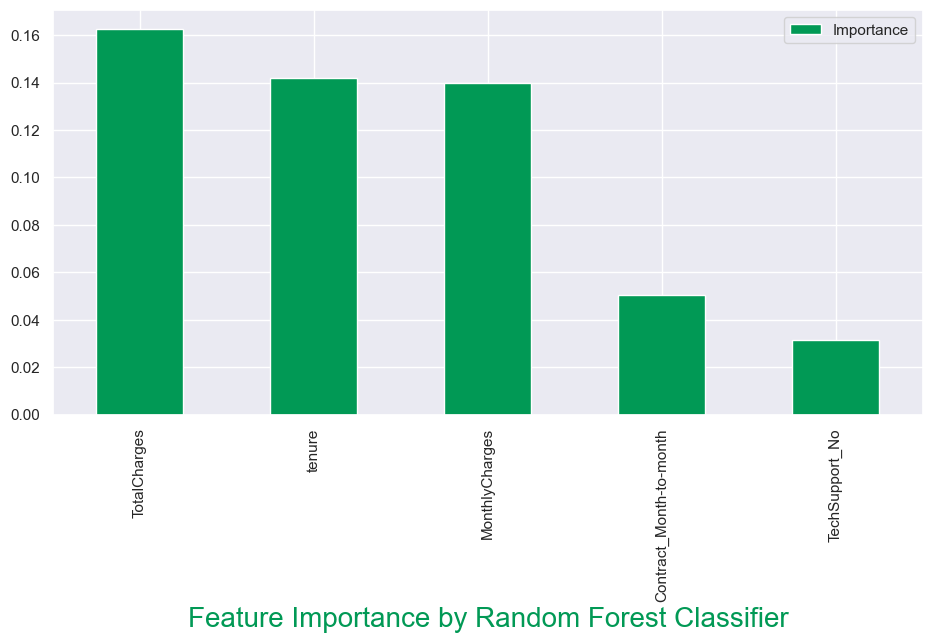

In [138]:
feature_importance_ = pd.DataFrame({'Importance' : RandomForestClassifier().fit(X, y).feature_importances_}, index = X.columns)

feature_importance_.sort_values(by = 'Importance', ascending = False, axis = 0)[:5].plot(kind = 'bar', color = '#019955', figsize = (10, 5))
plt.xlabel("Feature Importance by Random Forest Classifier", color = "#019955", fontdict= {"fontsize" : 20});

In [139]:
X_train_new_ = X_train[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No']]
X_test_new_ = X_test[['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_Month-to-month', 'OnlineSecurity_No']]

In [140]:
random_forest_new = RandomForestClassifier()
random_forest_new.fit(X_train_new_, y_train)

y_pred_rf_new = random_forest_new.predict(X_test_new_)
y_pred_train_rf_new = random_forest_new.predict(X_train_new_)

In [141]:
rf_as_new = metrics.accuracy_score(y_test, y_pred_rf_new)
rf_as_train_new = metrics.accuracy_score(y_train, y_pred_train_rf_new)

print(f"Accuracy score for test data : {rf_as_new}")
print(f"Accuracy score for train data : {rf_as_train_new}")

Accuracy score for test data : 0.7574321413183972
Accuracy score for train data : 0.9917215028656337


Nothing has changed again.

***Let's try with gridsearchcv to find best parameters.***

In [142]:
params_grid = {'criterion' : ['entropy', 'gini'], 'max_depth' : [2, 4, 6, 8], 'n_estimators' : [300, 400, 500],
              'min_samples_split' : [2, 4, 6, 8], 'min_samples_leaf' : [2, 3, 5, 7]}

gscv_rf = GridSearchCV(RandomForestClassifier(), params_grid, cv = 3, scoring = 'f1')
# gscv_rf.fit(X_train_sc, y_train)

In [ ]:
# gscv_rf.best_params_
# {'criterion': 'gini','max_depth': 8,'min_samples_leaf': 2,'min_samples_split': 8,'n_estimators': 400}

In [143]:
# model tunning with best parameters

rf_gscv =RandomForestClassifier(n_estimators = 400, criterion = 'gini', max_depth = 8, min_samples_split = 8, min_samples_leaf = 2)
rf_gscv.fit(X_train_sc, y_train)

y_pred_gsvc = rf_gscv.predict(X_test_sc)
y_pred_gsvc_train = rf_gscv.predict(X_train_sc)

rf_gscv_as = metrics.accuracy_score(y_test, y_pred_gsvc)
rf_gscv_train_as = metrics.accuracy_score(y_train, y_pred_gsvc_train)

print(f"Accuracy score for test data : {rf_gscv_as}")
print(f"Accuracy score for train data : {rf_gscv_train_as}")

Accuracy score for test data : 0.8035329599310642
Accuracy score for train data : 0.8342177881553811


In [144]:
metrics.confusion_matrix(y_test, y_pred_gsvc)

array([[1562,  149],
       [ 307,  303]], dtype=int64)

In [145]:
metrics.confusion_matrix(y_train, y_pred_gsvc_train)

array([[3193,  259],
       [ 522,  737]], dtype=int64)

**Now, we do not have an overfitting problem!**

# XGBoost

In [146]:
xg = XGBClassifier()
xg.fit(X_train_sc, y_train)

y_pred_xg = xg.predict(X_test_sc)

y_pred_xg_train = xg.predict(X_train_sc)

xg_as = metrics.accuracy_score(y_test, y_pred_xg)
xg_as_train = metrics.accuracy_score(y_train, y_pred_xg_train)

print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}")

Accuracy score of test data : 0.7694959069366653
Accuracy score of train data : 0.9622160900021227


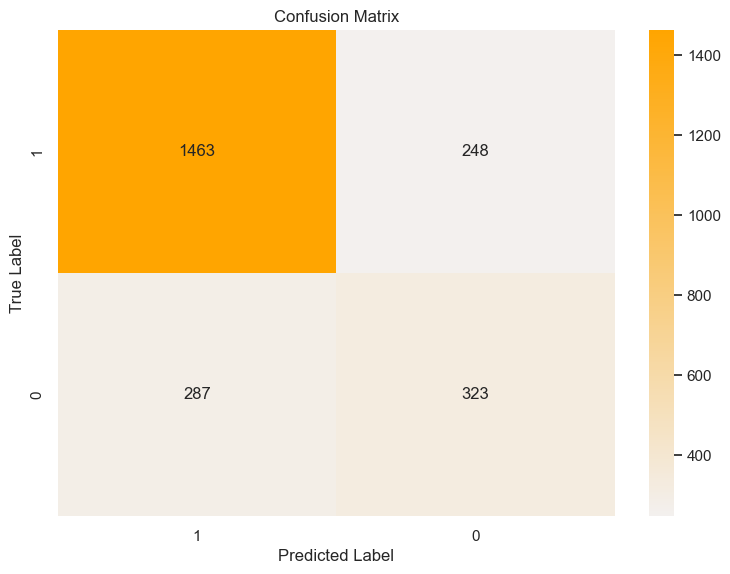

In [151]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xg is your trained XGBoost classifier
# Assuming X_test_sc and y_test are your test data and labels

# Get the predicted labels
y_pred = xg.predict(X_test_sc)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=sns.light_palette("orange", as_cmap=True),
            xticklabels=[1, 0], yticklabels=[1, 0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


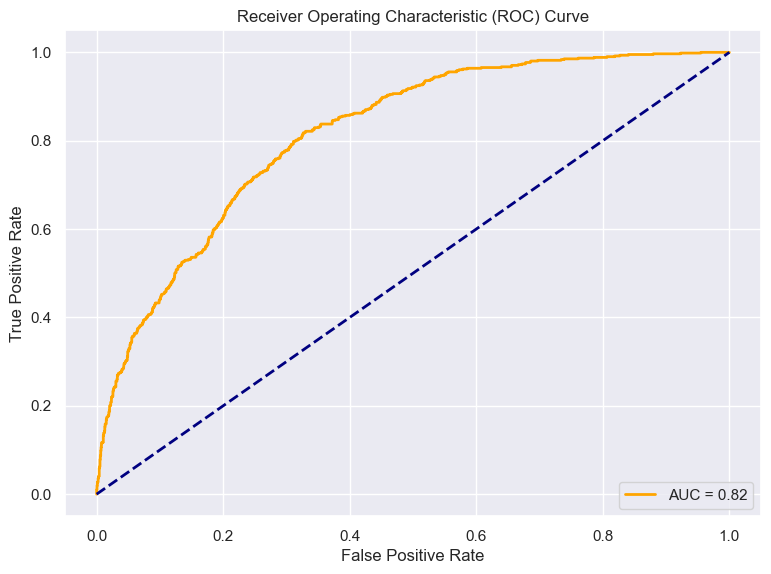

In [154]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming xg is your trained XGBoost classifier
# Assuming X_test_sc and y_test are your test data and labels

# Get the predicted probabilities for the positive class
y_proba = xg.predict_proba(X_test_sc)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [155]:
parameters = {'learning_rate' : [0.01, 0.03, 0.05], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600]}

In [156]:
xg_grid = GridSearchCV(XGBClassifier(), parameters, cv = 5)

In [157]:
# xg_grid.fit(X_train_sc, y_train)

In [158]:
# xg_grid.best_score_
# 0.804287486519285

In [159]:
# xg_grid.best_params_
# {'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 600}

In [160]:
# Parameters tunning
xg_gridcv =XGBClassifier(learning_rate = .05, max_depth = 1, n_estimators = 600)

xg_gridcv.fit(X_train_sc, y_train)

y_pred_xggrid = xg_gridcv.predict(X_test_sc)
y_pred_xggrid_train = xg_gridcv.predict(X_train_sc)

xg_as_grid = metrics.accuracy_score(y_test, y_pred_xggrid)
xg_as_grid_train = metrics.accuracy_score(y_train, y_pred_xggrid_train)

print(f"Accuracy score of test data : {xg_as_grid}")
print(f"Accuracy score of train data : {xg_as_grid_train}")

Accuracy score of test data : 0.8065489013356312
Accuracy score of train data : 0.8098068350668648


Now, looks good!

<Figure size 800x600 with 0 Axes>

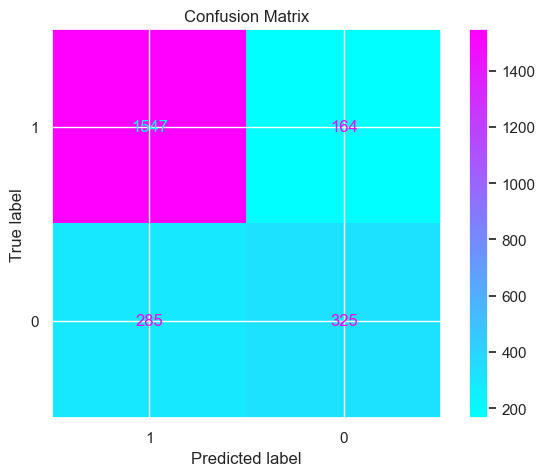

In [163]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = xg_gridcv.predict(X_test_sc)

# Create the confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[1, 0])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='cool')
plt.title('Confusion Matrix')
plt.show()


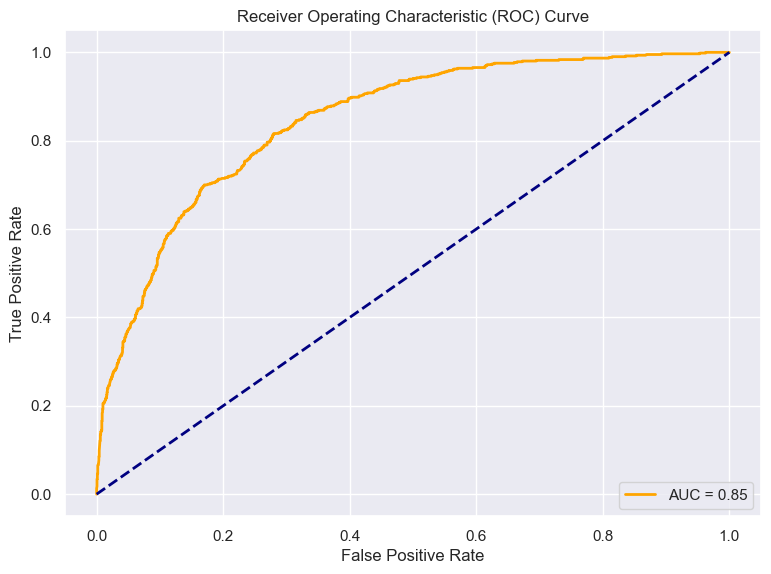

In [166]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming xg_gridcv is your trained XGBoost classifier
# Assuming X_test_sc and y_test are your test data and labels

# Get the predicted probabilities for the positive class
y_proba = xg_gridcv.predict_proba(X_test_sc)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting Classifier

In [167]:
grad_boost = GradientBoostingClassifier()

grad_boost.fit(X_train_sc, y_train)

y_pred_grad = grad_boost.predict(X_test_sc)
y_pred_grad_train = grad_boost.predict(X_train_sc)

grad_as = metrics.accuracy_score(y_test, y_pred_grad)
grad_as_train = metrics.accuracy_score(y_train, y_pred_grad_train)

print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}")

Accuracy score of test data : 0.7983627746660922
Accuracy score of train data : 0.8282742517512206


In [169]:
parameters_grad = {'learning_rate' : [0.01, 0.03, 0.05, 0.1], 'max_depth' : [1, 4, 6], 'n_estimators' : [100, 300, 400, 600, 800]}

grad_grid = GridSearchCV(GradientBoostingClassifier(), parameters_grad, cv = 5, scoring = 'f1')

# grad_grid.fit(X_train_sc, y_train)

In [ ]:
# grad_grid.best_params_
# {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 600}

In [ ]:
# grad_grid.best_score_
# 0.5984668361905707

In [170]:
# Parameter tunning

grad_grid_ = GradientBoostingClassifier(n_estimators = 600, max_depth = 1, learning_rate = .1)

grad_grid_.fit(X_train_sc, y_train)

y_pred_grad_grid = grad_grid_.predict(X_test_sc)
y_pred_grad_grid_train = grad_grid_.predict(X_train_sc)

grad_grid_as = metrics.accuracy_score(y_test, y_pred_grad_grid)
grad_grid_as_train = metrics.accuracy_score(y_train, y_pred_grad_grid_train)

print(f"Accuracy score of test data : {grad_grid_as}")
print(f"Accuracy score of train data : {grad_grid_as_train}")

Accuracy score of test data : 0.8048255062473072
Accuracy score of train data : 0.8098068350668648


<Figure size 800x600 with 0 Axes>

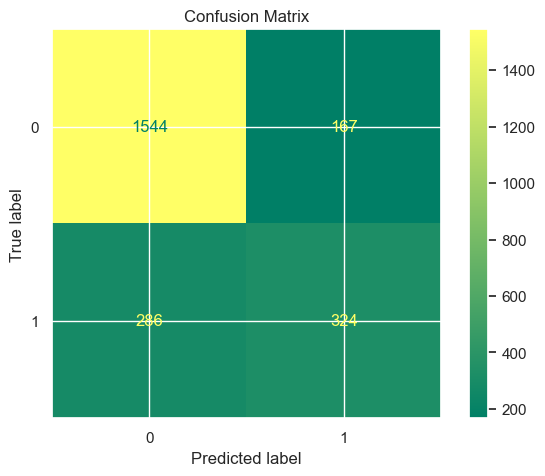

In [174]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming grad_grid_ is your trained gradient boosting classifier
# Assuming X_test_sc and y_test are your test data and labels

# Get the predicted labels
y_pred = grad_grid_.predict(X_test_sc)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='summer', values_format='d')
plt.title('Confusion Matrix')
plt.show()


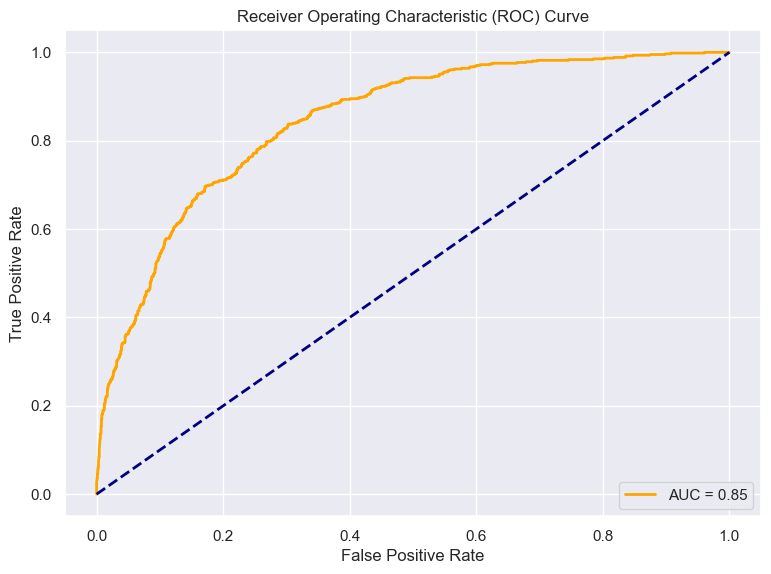

In [176]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Get the predicted probabilities for the positive class
y_proba = grad_grid_.predict_proba(X_test_sc)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Logistic Regression w/ Scaled Data

In [177]:
log_sc = LogisticRegression()
log_sc.fit(X_train_sc, y_train)

y_pred_log_sc = log_sc.predict(X_test_sc)
y_pred_log_sc_ = log_sc.predict(X_train_sc)

log_sc_as = metrics.accuracy_score(y_test, y_pred_log_sc)
log_sc_as_ = metrics.accuracy_score(y_train, y_pred_log_sc_)

print(f"Accuracy score of test data : {log_sc_as}")
print(f"Accuracy score of train data : {log_sc_as_}")

Accuracy score of test data : 0.8009478672985783
Accuracy score of train data : 0.8038632986627043


<Figure size 800x600 with 0 Axes>

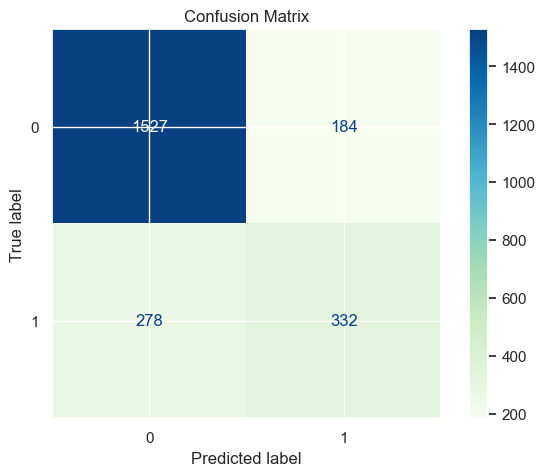

In [179]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming log_sc is your trained logistic regression classifier
# Assuming X_test_sc and y_test are your test data and labels

# Get the predicted labels
y_pred = log_sc.predict(X_test_sc)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='GnBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()


>  * We use KNN, Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier, LGBM, Gradien Boosting Classifier, SVC, and Logistic Regressin.

In [180]:
print("Logistic Regression results : \n")
print(f"Accuracy score of test data : {log_sc_as}")
print(f"Accuracy score of train data : {log_sc_as_}\n")

print("------------------------------------------------")

print("KNN results : \n")
print(f"Accuracy score for test data : {knn_as}")
print(f"Accuracy score for train data : {knn_as_train}\n")

print("------------------------------------------------")

print("SVC result without parameter tunning : \n")
print(f"Accuracy score for test data : {svc_sc_as}")
print(f"Accuracy score for train data : {svc_sc_train_as}\n")
print("SVC results with parameter tunning : \n")
print(f"Accuracy score for test data : {svc_new_as}")
print(f"Accuracy score for train data : {svc_new_train_as}\n")

print("------------------------------------------------")

print("LGBM results without parameter importance : \n")
print(f"LGBM accuracy score for test data {lgbm_test_as}")
print(f"LGBM accuracy score for train data {lgbm_train_as}\n")
print("LGBM result with feature importance : \n")
print(f"LGBM accuracy score for test data {lgbm_ft_as}")
print(f"LGBM accuracy score for train data {lgbm_ft_as_}\n")

print("------------------------------------------------")

print("Decision Tree Classifier results with parameter importance : \n")
print(f"Accuracy score for test data : {dt_as}")
print(f"Accuracy score for train data : {dt_as_train}\n")

print("------------------------------------------------")

print("Random Forest Classifier without parameter tunning : \n")
print(f"Accuracy score for test data : {rf_as}")
print(f"Accuracy score for train data : {rf_as_train}\n")
print("Random Forest Classifier with parameter tunning : \n")
print(f"Accuracy score for test data : {rf_gscv_as}")
print(f"Accuracy score for train data : {rf_gscv_train_as}\n")

print("------------------------------------------------")

print("XGBoost results without parameter tunning : \n")
print(f"Accuracy score of test data : {xg_as}")
print(f"Accuracy score of train data : {xg_as_train}\n")
print("XGBoost results with parameter tunning : \n")
print(f"Accuracy score of test data : {xg_as_grid}")
print(f"Accuracy score of train data : {xg_as_grid_train}\n")

print("------------------------------------------------")

print("Gradient Boosting Classifier results without parameter tunning : \n")
print(f"Accuracy score of test data : {grad_as}")
print(f"Accuracy score of train data : {grad_as_train}\n")
print("Gradient Boosting Classifier results with parameter tunning : \n")
print(f"Accuracy score of test data : {grad_grid_as}")
print(f"Accuracy score of train data : {grad_grid_as_train}")

Logistic Regression results : 

Accuracy score of test data : 0.8009478672985783
Accuracy score of train data : 0.8038632986627043

------------------------------------------------
KNN results : 

Accuracy score for test data : 0.7781128823782852
Accuracy score for train data : 0.8106559116960306

------------------------------------------------
SVC result without parameter tunning : 

Accuracy score for test data : 0.7970702283498492
Accuracy score for train data : 0.8193589471449798

SVC results with parameter tunning : 

Accuracy score for test data : 0.7987936234381732
Accuracy score for train data : 0.8102313733814477

------------------------------------------------
LGBM results without parameter importance : 

LGBM accuracy score for test data 0.7850064627315813
LGBM accuracy score for train data 0.9006580343876035

LGBM result with feature importance : 

LGBM accuracy score for test data 0.7819905213270142
LGBM accuracy score for train data 0.855656973041817

------------------